<a href="https://colab.research.google.com/github/sayalisa2li7/cyclistic-data-analysis/blob/main/Cyclistic_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CYCLISTIC BIKE-SHARE ANALYSIS**

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations

**TASKS:**

Three questions to guide the analysis:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**PROCESS:**

**Importing libraries and data**

In [1]:
#Mounting drive to get data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing libraries and packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import textwrap
import seaborn as sns

**Loading Data**
* Reading CSV files for 12 months
* Combining the data into one table

In [3]:
#Uploading Data
#2022june to 2022dec
june_2022=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202206-divvy-tripdata.csv')
july_2022=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202207-divvy-tripdata.csv')
aug_2022=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202208-divvy-tripdata.csv')
sept_2022=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202209-divvy-publictripdata.csv')
oct_2022=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202210-divvy-tripdata.csv')
nov_2022=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202211-divvy-tripdata.csv')
dec_2022=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202212-divvy-tripdata.csv')
data_2022=pd.concat([june_2022, july_2022, aug_2022, sept_2022, oct_2022, nov_2022, dec_2022])

In [4]:
#2023jan to 2023may
jan_2023=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202301-divvy-tripdata.csv')
feb_2023=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202302-divvy-tripdata.csv')
mar_2023=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202303-divvy-tripdata.csv')
apr_2023=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202304-divvy-tripdata.csv')
may_2023=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case study/202305-divvy-tripdata.csv')
data_2023=pd.concat([jan_2023, feb_2023, mar_2023, apr_2023, may_2023])

In [5]:
#Combine data of 12 months into one table.
data_full=pd.concat([data_2022, data_2023])

**Data Cleaning**

*   Exploring the data, data types.
*   Removing outliers and irrelevant data.
*   Removing Null and Duplicate values

In [6]:
#Data types in tables
data_full.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [7]:
#Dropping irrelevant columns.
to_drop = ['start_station_id', 'end_station_name', 'end_station_id', 'start_lat','start_lng','end_lat','end_lng']

data_full.drop(to_drop, inplace=True, axis=1)

In [8]:
#Checking for null value
data_full.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
member_casual         False
dtype: bool

In [9]:
#Dropping rows with null values
data_full=data_full.dropna(axis=0, how="any", subset=None, inplace=False)

In [10]:
#Checking for Duplicates
data_full.duplicated()
#no duplicated or null data present
#data cleaning complete

98        False
137       False
173       False
211       False
214       False
          ...  
604822    False
604823    False
604824    False
604825    False
604826    False
Length: 4994485, dtype: bool

**Data Tranformation**

*   Changing data types
*   Creating new columns
*  Removing outliers

In [11]:
#Change start and end time data type
data_full['started_at'] = pd.to_datetime(data_full['started_at'])
data_full['ended_at'] = pd.to_datetime(data_full['ended_at'])

In [12]:
#Adding Month, Week Day and Hour column to table
data_full['month'] = data_full['started_at'].dt.month_name()
data_full['dayofweek'] = data_full['started_at'].dt.day_name()
data_full['hour'] = data_full['started_at'].dt.hour
data_full = data_full.astype({'hour':'int8'})

In [13]:
#Removing trips with zero length
data_full['ride_length'] = (data_full['ended_at'] - data_full['started_at']) / datetime.timedelta(minutes=1)
data_full['ride_length'] = data_full['ride_length'].astype('int32')
data_full = data_full.drop(data_full[data_full.ride_length <= 0].index)
data_full.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,member_casual,month,dayofweek,hour,ride_length
98,B12AD6565494C368,classic_bike,2022-06-09 22:28:32,2022-06-09 22:52:17,California Ave & Milwaukee Ave,casual,June,Thursday,22,23
173,D47F7F27B7A505A0,electric_bike,2022-06-30 14:39:03,2022-06-30 15:15:38,Cottage Grove Ave & 51st St,casual,June,Thursday,14,36
214,76DAD9FC95774B53,electric_bike,2022-06-26 23:59:44,2022-06-27 00:25:26,Burnham Greenway & 105th St,casual,June,Sunday,23,25


**Data Analysis**

We will take a closer look at the dataset to find out how casual riders and members use Cyclistic bikes differently.

In [14]:
#Number of Members and Casual Riders
rider_type=data_full.groupby('member_casual', as_index=True)[['ride_id']].count()
rider_type.style.highlight_max(subset='ride_id', color='green')

,ride_id
member_casual,
casual,1684617
member,2541806


In [15]:
#Popular Rideable Type for riders
rideable_pivot=pd.pivot_table(data_full, index=['rideable_type'], values='ride_id', aggfunc='count', columns=['member_casual'])
rideable_pivot['total riders']=rideable_pivot['casual']+rideable_pivot['member']
rideable_pivot.style.highlight_max(subset=['casual','member','total riders'], color='green')

member_casual,casual,member,total riders
rideable_type,,,
classic_bike,736129.000000,1464646.000000,2200775.000000
docked_bike,135562.000000,nan,nan
electric_bike,812926.000000,1077160.000000,1890086.000000


In [16]:
#Popular Weed Day for riders
weekly_pivot=pd.pivot_table(data_full, index=['dayofweek'], values='ride_id', aggfunc='count', columns=['member_casual'])
weekly_pivot['total riders']=weekly_pivot['casual']+weekly_pivot['member']
weekly_pivot.style.highlight_max(subset=['casual','member','total riders'], color='green')

member_casual,casual,member,total riders
dayofweek,,,
Friday,256238,372833,629071
Monday,191650,351490,543140
Saturday,335523,320163,655686
Sunday,276471,288391,564862
Thursday,219686,395685,615371
Tuesday,198432,406061,604493
Wednesday,206617,407183,613800


In [17]:
#Popular Month for riders
monthly_pivot=pd.pivot_table(data_full, index=['month'], values='ride_id', aggfunc='count', columns=['member_casual'])
monthly_pivot['total riders']=monthly_pivot['casual']+monthly_pivot['member']
monthly_pivot.style.highlight_max(subset=['casual','member','total riders'], color='green')

member_casual,casual,member,total riders
month,,,
April,107912,204585,312497
August,269765,329865,599630
December,30512,93875,124387
February,32975,110125,143100
January,29919,111172,141091
July,308934,320136,629070
June,284182,312757,596939
March,47132,144671,191803
May,171945,271113,443058


In [19]:
#Popular hour for riders
hourly_pivot=pd.pivot_table(data_full, index=['hour'], values='ride_id', aggfunc='count', columns=['member_casual'])
hourly_pivot['total riders']=hourly_pivot['casual']+hourly_pivot['member']
hourly_pivot.style.highlight_max(subset=['casual','member','total riders'], color='green')

member_casual,casual,member,total riders
hour,,,
0,31833,25146,56979
1,20697,15345,36042
2,12439,8753,21192
3,7071,5332,12403
4,4785,5923,10708
5,8686,23744,32430
6,22612,73194,95806
7,38717,135784,174501
8,53084,163827,216911


In [20]:
#Creating pivot table for start station.
start_stn_pivot=pd.pivot_table(data_full, index=['start_station_name'], values='ride_id', aggfunc='count', columns=['member_casual'])
start_stn_pivot['total riders']=start_stn_pivot['casual']+start_stn_pivot['member']
start_stn_pivot=start_stn_pivot.sort_values(by='total riders', ascending=False)
start_stn_pivot=start_stn_pivot.head(10)
start_stn_pivot

member_casual,casual,member,total riders
start_station_name,,,
Streeter Dr & Grand Ave,48488.0,14935.0,63423.0
DuSable Lake Shore Dr & Monroe St,27120.0,7925.0,35045.0
DuSable Lake Shore Dr & North Blvd,19607.0,13747.0,33354.0
Michigan Ave & Oak St,20598.0,12273.0,32871.0
Wells St & Concord Ln,13705.0,18411.0,32116.0
Clark St & Elm St,10917.0,19588.0,30505.0
Millennium Park,21322.0,8308.0,29630.0
Kingsbury St & Kinzie St,7895.0,21330.0,29225.0
Theater on the Lake,15692.0,12581.0,28273.0


In [23]:
#Top 3 start stations for annual membership riders
start_stn_member=start_stn_pivot.sort_values(by=['member'], ascending=False)
start_stn_member=start_stn_member.head(3)
start_stn_member.style.highlight_max(subset='member', color='green')

member_casual,casual,member,total riders
start_station_name,,,
Kingsbury St & Kinzie St,7895.000000,21330.000000,29225.000000
Clark St & Elm St,10917.000000,19588.000000,30505.000000
Wells St & Concord Ln,13705.000000,18411.000000,32116.000000


In [24]:
#Top 3 start stations for casual riders
start_stn_casual=start_stn_pivot.sort_values(by=['casual'], ascending=False)
start_stn_casual=start_stn_casual.head(3)
start_stn_casual.style.highlight_max(subset='casual', color='green')

member_casual,casual,member,total riders
start_station_name,,,
Streeter Dr & Grand Ave,48488.000000,14935.000000,63423.000000
DuSable Lake Shore Dr & Monroe St,27120.000000,7925.000000,35045.000000
Millennium Park,21322.000000,8308.000000,29630.000000


In [25]:
#Top 10 stations with most number of riders
#define function for conditional formatting
def cond_formatting(x):
    if x > 50.0:
        return 'background-color: green'
    else:
        return None
#display DataFrame with conditional formatting applied
start_stn_total=start_stn_pivot.sort_values(by=['total riders'], ascending=False)
start_stn_total=start_stn_total.head(10)
start_stn_total
#Adding column to display member percentage
start_stn_total['%member']=start_stn_total['member']/start_stn_total['total riders']*100
#Highlighting column with more than 50% of the riders being annual members.
start_stn_total_green=start_stn_total.style.applymap(cond_formatting, subset=['%member'],)
start_stn_total_green

member_casual,casual,member,total riders,%member
start_station_name,,,,
Streeter Dr & Grand Ave,48488.000000,14935.000000,63423.000000,23.548240
DuSable Lake Shore Dr & Monroe St,27120.000000,7925.000000,35045.000000,22.613782
DuSable Lake Shore Dr & North Blvd,19607.000000,13747.000000,33354.000000,41.215446
Michigan Ave & Oak St,20598.000000,12273.000000,32871.000000,37.336862
Wells St & Concord Ln,13705.000000,18411.000000,32116.000000,57.326566
Clark St & Elm St,10917.000000,19588.000000,30505.000000,64.212424
Millennium Park,21322.000000,8308.000000,29630.000000,28.039150
Kingsbury St & Kinzie St,7895.000000,21330.000000,29225.000000,72.985458
Theater on the Lake,15692.000000,12581.000000,28273.000000,44.498285


**Data Visualizations**

Visualizing the information we have discovered through our analysis.

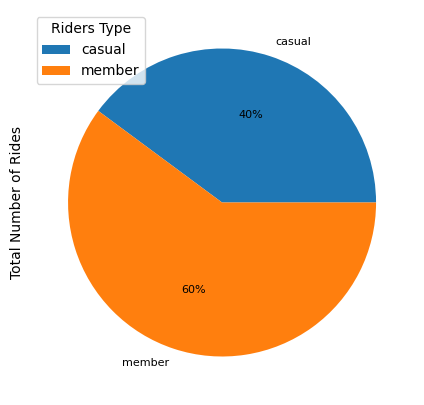

In [26]:
#Pie chart displaying percentage of rider type.
rider_type['ride_id'].plot.pie(x='member_casual', ylabel='Total Number of Rides',fontsize='8',autopct='%1.0f%%', figsize=(5, 5)).legend(loc='upper left',title="Riders Type")
plt.show()

The pie chart shows that annual members represent the majority of Cyclistic's riders, making up for 60% of total users.

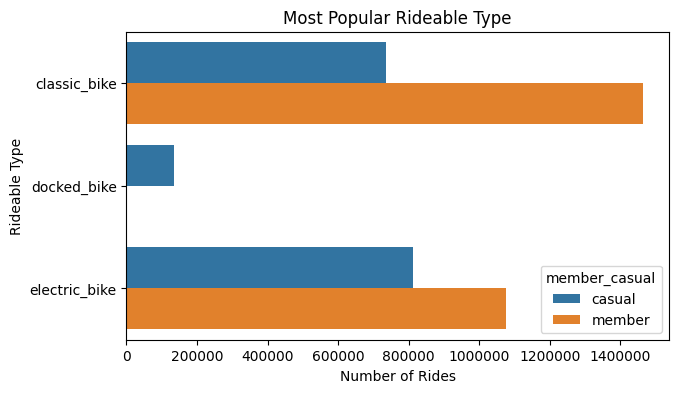

In [27]:
#Bar chart for most popular rideable type for different rider types.
df0 = data_full[['rideable_type', 'member_casual', 'ride_id']]
df0 = df0.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (7,4))
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', palette='tab10', data=df0).set_title('Most Popular Rideable Type')

plt.xlabel('Number of Rides')
plt.ylabel('Rideable Type')
plt.show()

It is clear in the visualization that classic bike is the most rented rideable type for annual members. Whereas, for casual riders, electric bikes are more popular.

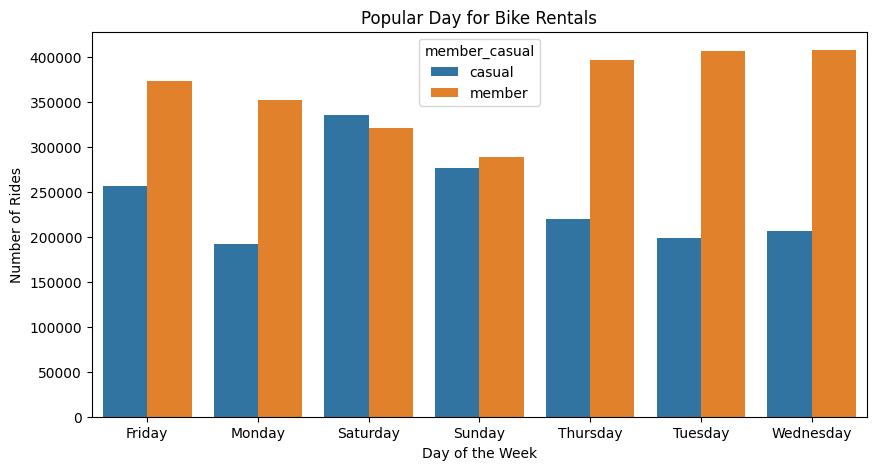

In [28]:
#Weekday Visualization
#Bar chart for most popular week day for different rider types.
df1 = data_full.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_id']].count()
plt.figure(figsize = (10,5))
sns.barplot(data=df1, x='dayofweek', y='ride_id', hue='member_casual', palette='tab10').set_title('Popular Day for Bike Rentals')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

The visualizations show that annual members consistently rent bikes on a daily basis while casual riders present lower weekday numbers compared to the weekend.

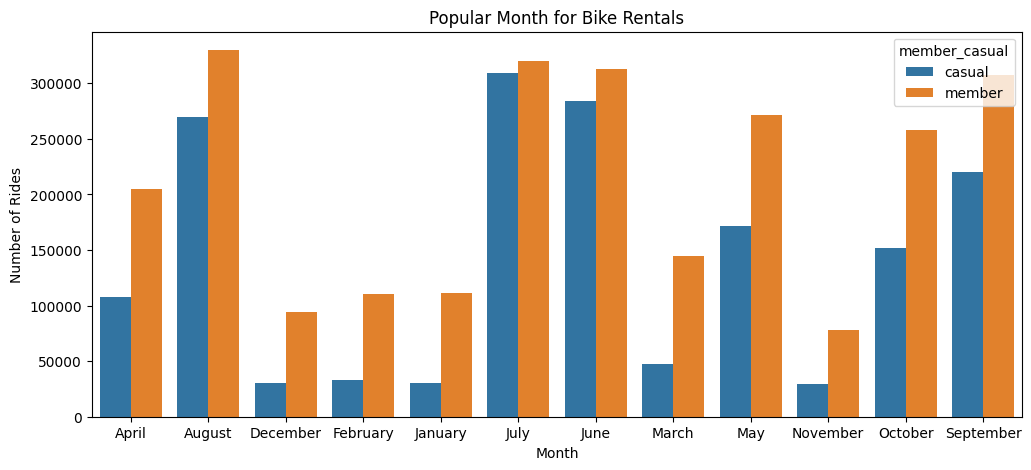

In [29]:
#Month Visualization
#Bar chart for most month for different rider types.
df2 = data_full.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()
plt.figure(figsize = (12,5))
sns.barplot(data=df2, x='month', y='ride_id', hue='member_casual', palette='tab10').set_title('Popular Month for Bike Rentals')

plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

July is the month with the most number of riders.

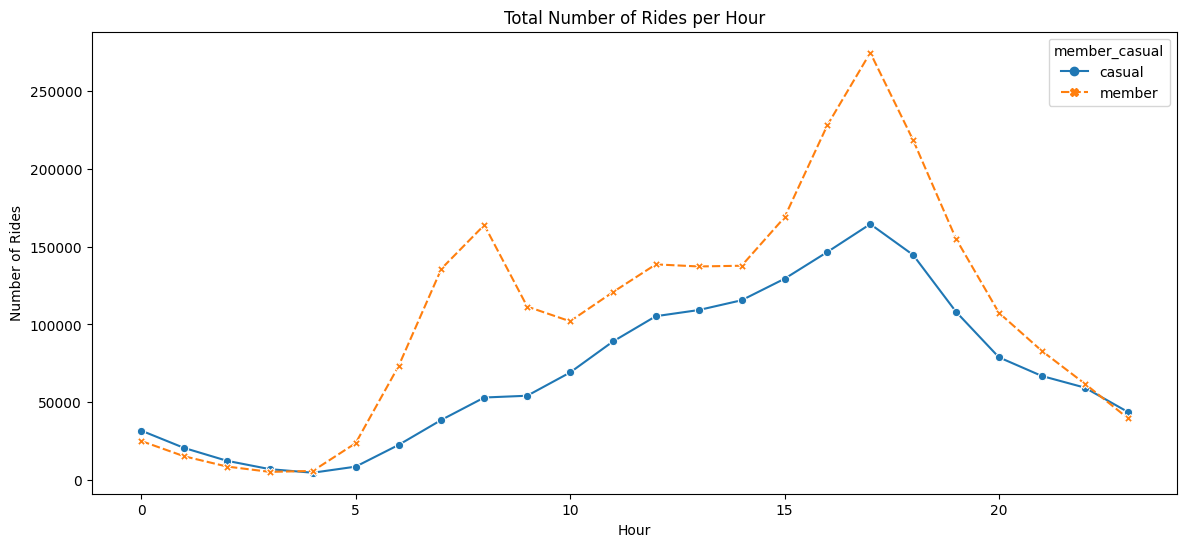

In [30]:
#Popular Hour Visualization
df3 = data_full[['hour', 'member_casual', 'ride_id']]
df3 = df3.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (14,6))
sns.lineplot(data=df3, x='hour', y='ride_id', hue='member_casual', palette='tab10',
             style='member_casual', markers=True).set_title('Total Number of Rides per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.show()

The popular hour for both types of riders is 5 PM.

Text(0, 0.5, 'Number of Rides')

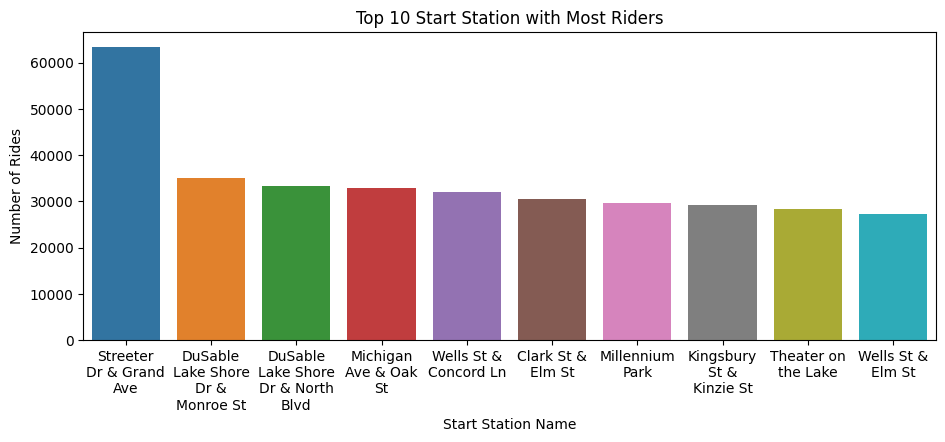

In [31]:
#Top 10 start stations visualization
df4 = data_full.groupby(['start_station_name'], as_index=False)[['ride_id']].count()
df4=df4.sort_values(by='ride_id', ascending=False)
df4=df4.head(10)
fig, ax = plt.subplots(figsize=(11, 4))
ax.set_title('Top 10 Start Station with Most Riders')
sns.barplot(data=df4, x='start_station_name', y='ride_id', ax=ax, palette='tab10')

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
plt.xlabel('Start Station Name')
plt.ylabel('Number of Rides')

**KEY FINDINGS:**


* The total number of rides taken from June of 2022 to May of 2023 was 4226423. Out of this 2541806 number of rides were from riders with annual membership, making up to 60% of the totall rides taken.

* Classic bikes are the most popular rideable type. They are also the most popular rideable type among annual membership riders, followed by electric bikes. Majority of the casual riders prefer to ride electric bikes, followed by docked biked. However, none of the annual membership riders prefer using docked bikes.

* For casual riders, the most popular days are Saturday and Sunday, respectively. Whereas, for annual membership riders, the most popular days are Wednesday and Tuesday, respectively. Overall, Saturday has the most number of total riders.
Casual riders mostly rent bikes on weekends while members use them consistently throughout the week.

* For casual riders, the most popular month is July. And, for annual membership riders, the most popular month is August. July is also the most popular month overall.
August, July and June have the most numbers of riders. There is a clear rise in the number of rides taken in the months of summer.

* The number of bike rentals by both casual and annual membership riders peak at 5 pm.
The numbers of casual riders grows gradually throughout the day, peaking at 5 pm. Whereas, there are significant peaks in the number of annual membership riders during the morning hours and later at 5 pm.

* The most popular start station for casual riders is 'Kingsbury St & Kinzie St'. For annual membership riders, it is 'Streeter Dr & Grand Ave'. Streeter Dr & Grand Ave is also the most popular start station in general.

**RECOMMENDATIONS:**

* Increase marketing campaign targeted at casual riders.The ads could offer special discounts for the annual membership to encourage casual riders to become members.

* Most casual riders prefer electric bikes. Offering to subscribe to electric bikes at a discounted price can encourage more casual riders to buy a subscription.

* Weekends see the most number of casual riders. Designing a new type of subcription plan only for weekend riders can also increase the amount of members. Similarly, a different type of membership plan for seasonal riders will also help increase the member count.

* Out of the top 10 start stations, only 4 have above 50% of the riders with an annual membership. The other 6 stations should be targeted during marketing campaigns to increase the percentage of annual membership riders. Adverstising during the peak hours may also help.